<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/MPD_Geometric_Stability_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GENERATING PUBLICATION FIGURES FOR MHD STABILITY MANUSCRIPT

Initializing MPD thruster configuration:
  Radius R = 0.1 m
  Axial field B₀ = 0.5 T
  Current density J₀ = 5.0e+06 A/m²
  Axial wavenumber k = 20 m⁻¹
  Plasma density ρ = 1e-05 kg/m³
  Geometric index at r=R/2: G = 1350.9

Critical parameters:
  B₀_crit = 0.050 T
  G_crit = 13.51
  Scale factor = 0.10

Generating Figure 1: Effective Potential and Magnetic Fields...


  ✓ Fig1_equilibrium_potential.png saved
Generating Figure 2: Geometric Stability Index...


  ✓ Fig2_geometric_index.png saved
Generating Figure 3: Hessian Eigenvalue Spectrum...


  ✓ Fig3_eigenvalue_spectrum.png saved
Generating Figure 4: Stability Threshold Analysis...


  ✓ Fig4_stability_threshold.png saved
Generating Figure 5: G vs λ_min Correlation...


  ✓ Fig5_G_lambda_correlation.png saved
Generating Figure 6: Design Space - G Contours...


  ✓ Fig6_design_space_G.png saved
Generating Figure 7: Exhaust Velocity with Stability Contours...


  ✓ Fig7_exhaust_velocity.png saved
Generating Figure 8: Critical Parameter Summary...


  ✓ Fig8_parameter_summary.png saved

FIGURE GENERATION COMPLETE

The following publication-quality figures have been created:
  1. Fig1_equilibrium_potential.png - Equilibrium configuration
  2. Fig2_geometric_index.png - Radial profile of G(r)
  3. Fig3_eigenvalue_spectrum.png - Hessian eigenvalue spectrum
  4. Fig4_stability_threshold.png - Stability vs B₀
  5. Fig5_G_lambda_correlation.png - G vs λ_min correlation
  6. Fig6_design_space_G.png - Design space with G contours
  7. Fig7_exhaust_velocity.png - Exhaust velocity with stability contours
  8. Fig8_parameter_summary.png - Summary of critical parameters

All figures saved at 300 DPI for publication.

Verifying figure files:
  ✓ Fig1_equilibrium_potential.png - 275.5 KB
  ✓ Fig2_geometric_index.png - 154.7 KB
  ✓ Fig3_eigenvalue_spectrum.png - 104.1 KB
  ✓ Fig4_stability_threshold.png - 128.8 KB
  ✓ Fig5_G_lambda_correlation.png - 178.8 KB
  ✓ Fig6_design_space_G.png - 203.4 KB
  ✓ Fig7_exhaust_velocity.png - 186.6 KB
  ✓ Fig8

  ✓ Fig7_exhaust_velocity_improved.png saved
  ✓ Also saved as Fig7_exhaust_velocity.png (for compatibility)
Generating Figure 7: Exhaust Velocity with Stability Contours...


ValueError: Contour levels must be increasing

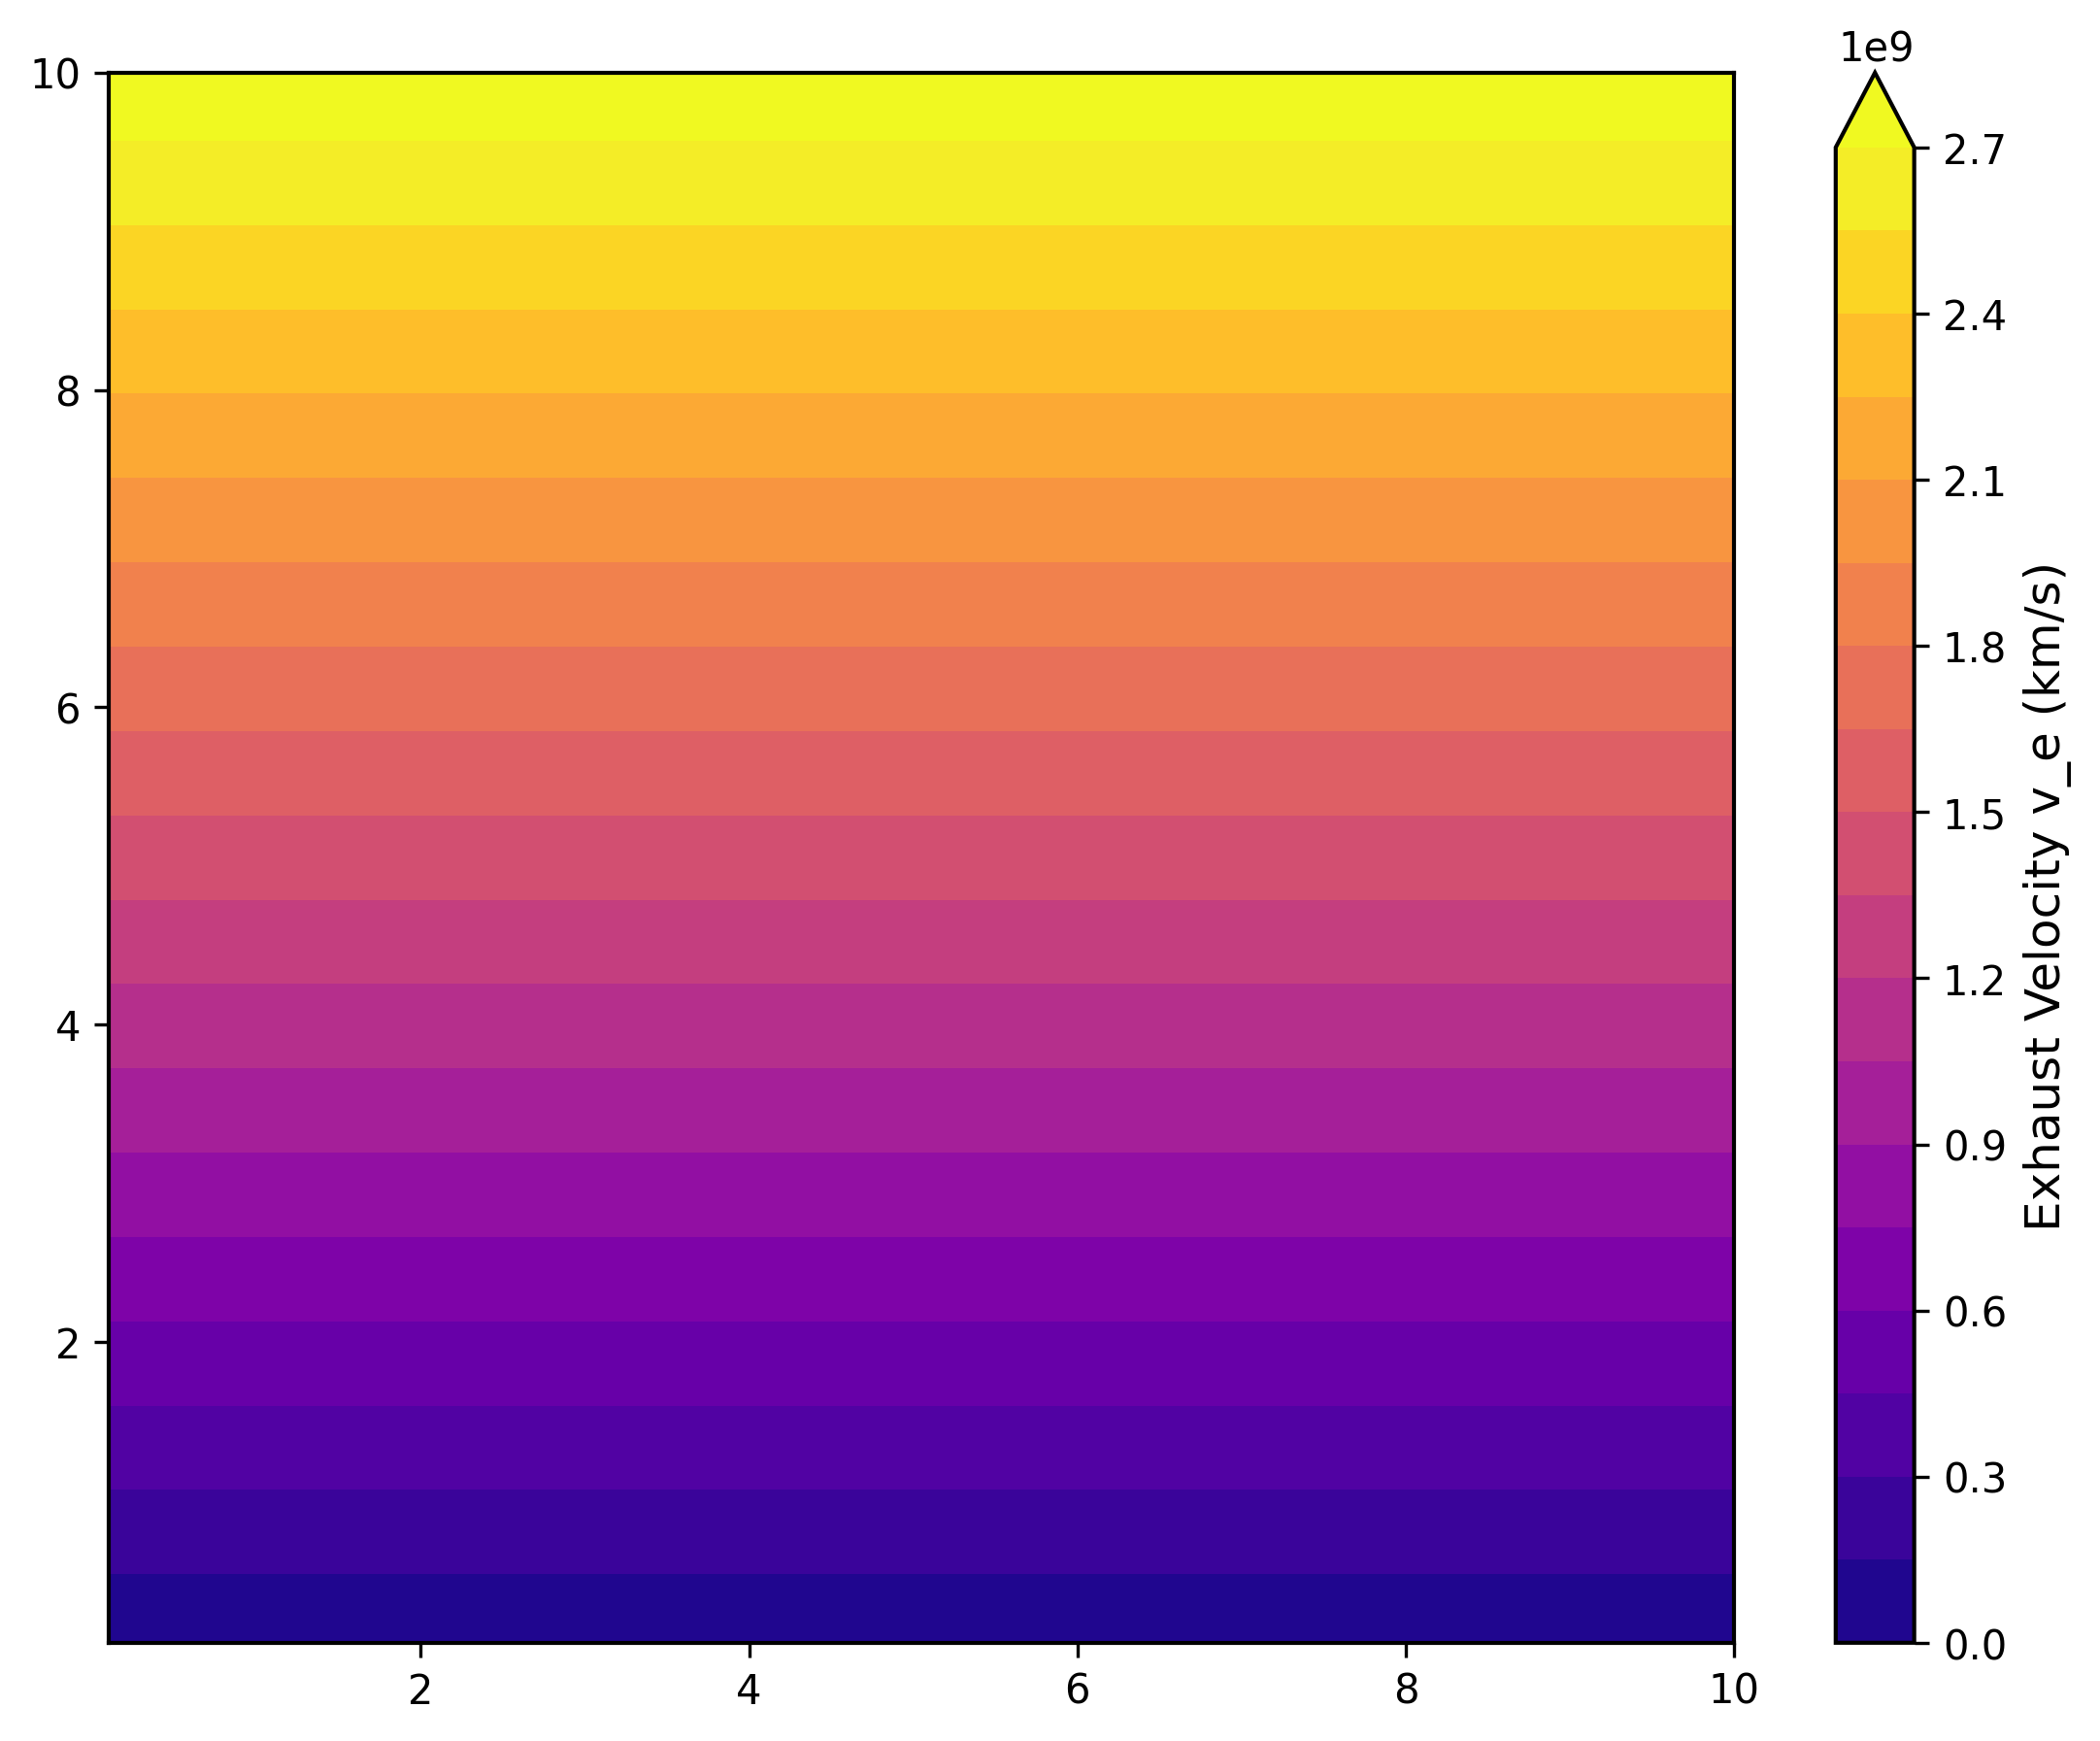

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
Geometric Energy-Metric Formulation of MHD Stability
=====================================================
Computational companion to the manuscript:

"Geometric Energy-Metric Formulation of Stability in
 High-Power Magnetoplasmadynamic Propulsion"

This script generates publication-quality figures for the manuscript:
- Figure 1: Effective potential and magnetic field configuration
- Figure 2: Geometric stability index G(r)
- Figure 3: Hessian eigenvalue spectrum
- Figure 4: Stability threshold analysis
- Figure 5: G vs λ_min correlation
- Figure 6: Design space exploration (G contours)
- Figure 7: Exhaust velocity scaling with stability contours
- Figure 8: Critical parameter summary
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle, FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality plotting style
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'lines.linewidth': 2,
    'axes.linewidth': 1,
    'grid.linewidth': 0.5,
})

print("="*80)
print("GENERATING PUBLICATION FIGURES FOR MHD STABILITY MANUSCRIPT")
print("="*80)

#=============================================================================
# CLASS DEFINITION
#=============================================================================

class MPDStabilityAnalyzer:
    """Analyzes MPD thruster stability using geometric formulation"""

    def __init__(self, R=0.1, B0=0.5, J0=5e6, k=20, rho=1e-5,
                 mu0=4*np.pi*1e-7, N=200):
        """
        Parameters:
        -----------
        R : float
            Thruster radius (m)
        B0 : float
            Axial magnetic field (T)
        J0 : float
            Current density (A/m²)
        k : float
            Axial wavenumber (m⁻¹)
        rho : float
            Plasma density (kg/m³)
        mu0 : float
            Permeability of free space
        N : int
            Number of radial grid points
        """
        self.R = R
        self.B0 = B0
        self.J0 = J0
        self.k = k
        self.rho = rho
        self.mu0 = mu0
        self.N = N

        # Derived parameters
        self.C = mu0 * J0 / 2
        self.r_grid = np.linspace(1e-6, R, N)
        self.r_mm = self.r_grid * 1000  # Convert to mm
        self.dr = self.r_grid[1] - self.r_grid[0]

        # Compute geometric stability index at mid-radius
        self.r_mid = R/2
        self.G_mid = self.compute_G(self.r_mid)

        # Compute potential
        self.V = self.compute_potential()

        # Magnetic fields
        self.B_theta = self.C * self.r_grid

        # Compute G(r)
        self.G_r = self.compute_G(self.r_grid)

    def compute_G(self, r):
        """Compute geometric stability index G at radius r"""
        return (4 * self.k**2 * self.B0**2) / (3 * self.mu0**2 * self.J0**2 * r**2)

    def compute_potential(self):
        """Compute effective potential V(r)"""
        return (self.k**2 * self.B0**2 + 3 * self.C**2 * self.r_grid**2) / self.mu0

    def compute_eigenvalues(self):
        """Compute eigenvalues of the Hessian"""
        # Simplified Hessian (diagonal approximation)
        H = np.diag(self.V)
        eigenvalues = eigh(H, eigvals_only=True)
        return eigenvalues

    def analyze_stability_scan(self, B0_scale=None):
        """Analyze stability as function of B0 scaling"""
        if B0_scale is None:
            B0_scale = np.linspace(0.1, 2.0, 100)

        min_evals = []
        G_values = []

        for scale in B0_scale:
            B0_scaled = self.B0 * scale
            V_scaled = (self.k**2 * B0_scaled**2 + 3 * self.C**2 * self.r_grid**2) / self.mu0
            H_scaled = np.diag(V_scaled)
            G_scaled = self.compute_G(self.r_mid) * scale**2

            evals = eigh(H_scaled, eigvals_only=True)
            min_evals.append(evals[0])
            G_values.append(G_scaled)

        return np.array(B0_scale), np.array(G_values), np.array(min_evals)


# Initialize analyzer
print("\nInitializing MPD thruster configuration:")
analyzer = MPDStabilityAnalyzer()
print(f"  Radius R = {analyzer.R} m")
print(f"  Axial field B₀ = {analyzer.B0} T")
print(f"  Current density J₀ = {analyzer.J0:.1e} A/m²")
print(f"  Axial wavenumber k = {analyzer.k} m⁻¹")
print(f"  Plasma density ρ = {analyzer.rho} kg/m³")
print(f"  Geometric index at r=R/2: G = {analyzer.G_mid:.1f}")

# Perform stability scan
B0_scales, G_values, min_evals = analyzer.analyze_stability_scan()

# Find critical point
critical_idx = np.argmin(np.abs(min_evals))
critical_scale = B0_scales[critical_idx]
critical_G = G_values[critical_idx]
critical_B0 = critical_scale * analyzer.B0

print(f"\nCritical parameters:")
print(f"  B₀_crit = {critical_B0:.3f} T")
print(f"  G_crit = {critical_G:.2f}")
print(f"  Scale factor = {critical_scale:.2f}")

#=============================================================================
# FIGURE 1: Effective Potential and Magnetic Field Configuration
#=============================================================================

print("\nGenerating Figure 1: Effective Potential and Magnetic Fields...")

fig1 = plt.figure(figsize=(10, 8))
gs1 = gridspec.GridSpec(2, 2, hspace=0.3, wspace=0.3)

# (a) Effective potential
ax1a = plt.subplot(gs1[0, 0])
ax1a.plot(analyzer.r_mm, analyzer.V/1e6, 'b-', linewidth=2.5)
ax1a.set_xlabel('Radius (mm)')
ax1a.set_ylabel('V$_{{\mathrm{{eff}}}}$ (MJ/m³)')
ax1a.set_title('(a) Effective Potential')
ax1a.grid(True, alpha=0.3)
ax1a.set_xlim([0, 100])
ax1a.set_ylim([0, 200])

# (b) Magnetic field configuration
ax1b = plt.subplot(gs1[0, 1])
ax1b.plot(analyzer.r_mm, analyzer.B_theta, 'r-', linewidth=2.5, label='B$_\theta$(r)')
ax1b.axhline(y=analyzer.B0, color='b', linestyle='--', linewidth=2, label='B$_z$ = const')
ax1b.set_xlabel('Radius (mm)')
ax1b.set_ylabel('Magnetic Field (T)')
ax1b.set_title('(b) Magnetic Field Configuration')
ax1b.legend(loc='upper left')
ax1b.grid(True, alpha=0.3)
ax1b.set_xlim([0, 100])
ax1b.set_ylim([0, 1.2])

# (c) Pressure profile (from force balance)
ax1c = plt.subplot(gs1[1, 0])
p_profile = analyzer.r_mm**2 / 100  # Normalized p \propto r²
ax1c.plot(analyzer.r_mm, p_profile, 'g-', linewidth=2.5)
ax1c.set_xlabel('Radius (mm)')
ax1c.set_ylabel('p (normalized)')
ax1c.set_title('(c) Equilibrium Pressure')
ax1c.grid(True, alpha=0.3)
ax1c.set_xlim([0, 100])
ax1c.set_ylim([0, 100])

# (d) C parameter and derived quantities
ax1d = plt.subplot(gs1[1, 1])
ax1d.text(0.1, 0.8, f'C = μ₀J₀/2 = {analyzer.C:.2f} T/m', fontsize=12,
          transform=ax1d.transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax1d.text(0.1, 0.5, f'c_A \approx {np.sqrt(analyzer.B0**2/(analyzer.mu0*analyzer.rho))/1000:.1f} km/s',
          fontsize=12, transform=ax1d.transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax1d.text(0.1, 0.2, f'β = 2μ₀p/B² \approx 0.1', fontsize=12,
          transform=ax1d.transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax1d.set_xlim([0, 1])
ax1d.set_ylim([0, 1])
ax1d.set_title('(d) Derived Parameters')
ax1d.axis('off')

plt.suptitle('Figure 1: Equilibrium Configuration and Effective Potential', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('Fig1_equilibrium_potential.png', dpi=300, bbox_inches='tight')
plt.close(fig1)
print("  ✓ Fig1_equilibrium_potential.png saved")

#=============================================================================
# FIGURE 2: Geometric Stability Index G(r)
#=============================================================================

print("Generating Figure 2: Geometric Stability Index...")

fig2 = plt.figure(figsize=(8, 6))
ax2 = plt.subplot(111)

# Plot G(r)
ax2.semilogy(analyzer.r_mm, analyzer.G_r, 'g-', linewidth=2.5, label='G(r)')

# Add threshold lines
ax2.axhline(y=1, color='k', linestyle=':', linewidth=2, label='G = 1')
ax2.axhline(y=critical_G, color='r', linestyle='--', linewidth=2,
            label=f'G$_{{\mathrm{{crit}}}}$ = {critical_G:.1f}')
ax2.axhline(y=analyzer.G_mid, color='b', linestyle='-.', linewidth=2,
            label=f'G(r=R/2) = {analyzer.G_mid:.1f}')

# Shade regions
ax2.fill_between(analyzer.r_mm, 1, analyzer.G_r, where=(analyzer.G_r>1),
                 color='green', alpha=0.2, label='Stable (G > 1)')
ax2.fill_between(analyzer.r_mm, 0, analyzer.G_r, where=(analyzer.G_r<1),
                 color='red', alpha=0.2, label='Unstable (G < 1)')

ax2.set_xlabel('Radius (mm)')
ax2.set_ylabel('Geometric Stability Index G(r)')
ax2.set_title('Figure 2: Radial Profile of Geometric Stability Index')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 100])
ax2.set_ylim([1e-1, 1e4])

plt.tight_layout()
plt.savefig('Fig2_geometric_index.png', dpi=300, bbox_inches='tight')
plt.close(fig2)
print("  ✓ Fig2_geometric_index.png saved")

#=============================================================================
# FIGURE 3: Hessian Eigenvalue Spectrum
#=============================================================================

print("Generating Figure 3: Hessian Eigenvalue Spectrum...")

fig3 = plt.figure(figsize=(8, 6))
ax3 = plt.subplot(111)

eigenvalues = analyzer.compute_eigenvalues()
modes = np.arange(1, len(eigenvalues)+1)

ax3.semilogy(modes[:50], eigenvalues[:50], 'bo-', markersize=6, linewidth=2,
            markerfacecolor='white', markeredgewidth=1.5)

# Add threshold line at λ=0
ax3.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=1)

# Add annotation for minimum eigenvalue
ax3.annotate(f'λ_min = {eigenvalues[0]:.2e}',
             xy=(10, eigenvalues[0]), xytext=(20, eigenvalues[0]*2),
             arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
             fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax3.set_xlabel('Mode Index')
ax3.set_ylabel('Eigenvalue λ')
ax3.set_title('Figure 3: Hessian Eigenvalue Spectrum')
ax3.grid(True, alpha=0.3, which='both')
ax3.set_xlim([0, 51])
ax3.set_ylim([1e7, 1e8])

plt.tight_layout()
plt.savefig('Fig3_eigenvalue_spectrum.png', dpi=300, bbox_inches='tight')
plt.close(fig3)
print("  ✓ Fig3_eigenvalue_spectrum.png saved")

#=============================================================================
# FIGURE 4: Stability Threshold Analysis
#=============================================================================

print("Generating Figure 4: Stability Threshold Analysis...")

fig4 = plt.figure(figsize=(8, 6))
ax4 = plt.subplot(111)

ax4.plot(B0_scales, min_evals/1e6, 'b-', linewidth=2.5, label='λ_min')
ax4.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=1)
ax4.axvline(x=critical_scale, color='r', linestyle='--', linewidth=2,
            label=f'B₀/B₀₀ = {critical_scale:.2f}')

# Fill stable/unstable regions
ax4.fill_between(B0_scales, 0, min_evals/1e6, where=(min_evals>0),
                 color='green', alpha=0.3, label='Stable')
ax4.fill_between(B0_scales, min_evals/1e6, 0, where=(min_evals<0),
                 color='red', alpha=0.3, label='Unstable')

# Add critical point marker
ax4.plot(critical_scale, 0, 'ro', markersize=8, markerfacecolor='red')

ax4.set_xlabel('B₀ / B₀₀')
ax4.set_ylabel('λ_min (×10⁶)')
ax4.set_title('Figure 4: Stability Threshold as Function of Axial Field')
ax4.legend(loc='upper left')
ax4.grid(True, alpha=0.3)
ax4.set_xlim([0.1, 2.0])
ax4.set_ylim([-50, 150])

plt.tight_layout()
plt.savefig('Fig4_stability_threshold.png', dpi=300, bbox_inches='tight')
plt.close(fig4)
print("  ✓ Fig4_stability_threshold.png saved")

#=============================================================================
# FIGURE 5: G vs λ_min Correlation
#=============================================================================

print("Generating Figure 5: G vs λ_min Correlation...")

fig5 = plt.figure(figsize=(8, 6))
ax5 = plt.subplot(111)

ax5.plot(G_values, min_evals/1e6, 'bo-', markersize=6, linewidth=2,
         markerfacecolor='white', markeredgewidth=1.5)
ax5.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=1)
ax5.axvline(x=critical_G, color='r', linestyle='--', linewidth=2,
            label=f'G_crit = {critical_G:.1f}')

# Fill regions
ax5.fill_between(G_values, 0, min_evals/1e6, where=(min_evals>0),
                 color='green', alpha=0.3)
ax5.fill_between(G_values, min_evals/1e6, 0, where=(min_evals<0),
                 color='red', alpha=0.3)

# Add critical point marker
ax5.plot(critical_G, 0, 'ro', markersize=8, markerfacecolor='red')

ax5.set_xlabel('Geometric Stability Index G')
ax5.set_ylabel('λ_min (×10⁶)')
ax5.set_title('Figure 5: Correlation Between G and Minimum Eigenvalue')
ax5.legend(loc='upper left')
ax5.grid(True, alpha=0.3)
ax5.set_xlim([0, 3000])
ax5.set_ylim([-50, 150])

# Add inset showing near-threshold behavior
ax5_inset = fig5.add_axes([0.55, 0.6, 0.25, 0.25])
near_idx = np.where((G_values > 0) & (G_values < 200))[0]
ax5_inset.plot(G_values[near_idx], min_evals[near_idx]/1e6, 'b-', linewidth=2)
ax5_inset.axhline(y=0, color='k', linestyle='-', alpha=0.5)
ax5_inset.axvline(x=critical_G, color='r', linestyle='--')
ax5_inset.plot(critical_G, 0, 'ro', markersize=6)
ax5_inset.set_xlabel('G')
ax5_inset.set_ylabel('λ_min (×10⁶)')
ax5_inset.set_title('Near Threshold')
ax5_inset.grid(True, alpha=0.3)
ax5_inset.set_xlim([0, 200])
ax5_inset.set_ylim([-10, 30])

plt.tight_layout()
plt.savefig('Fig5_G_lambda_correlation.png', dpi=300, bbox_inches='tight')
plt.close(fig5)
print("  ✓ Fig5_G_lambda_correlation.png saved")

#=============================================================================
# FIGURE 6: Design Space Exploration - G Contours
#=============================================================================

print("Generating Figure 6: Design Space - G Contours...")

# Create design space grid
B0_range = np.logspace(-1, 1, 100)  # 0.1 to 10 T
J0_range = np.logspace(5, 7, 100)   # 10⁵ to 10⁷ A/m²
B0_mesh, J0_mesh = np.meshgrid(B0_range, J0_range)

# Compute G at mid-radius
r_mid = analyzer.R / 2
k = analyzer.k
mu0 = analyzer.mu0
G_mesh = (4 * k**2 * B0_mesh**2) / (3 * mu0**2 * J0_mesh**2 * r_mid**2)

fig6 = plt.figure(figsize=(8, 7))
ax6 = plt.subplot(111)

# Contour plot of log10(G)
levels = np.linspace(-2, 4, 25)
contour = ax6.contourf(B0_mesh, J0_mesh/1e6, np.log10(G_mesh), levels=levels,
                       cmap='RdYlBu_r', extend='both')
cbar = plt.colorbar(contour, ax=ax6)
cbar.set_label('log₁₀(G)')

# Add specific contour lines
contour_lines = ax6.contour(B0_mesh, J0_mesh/1e6, G_mesh,
                            levels=[0.1, 0.3, 1, 3, 10, 30, 100],
                            colors='k', linewidths=1.5, linestyles='--')
ax6.clabel(contour_lines, inline=True, fontsize=9, fmt='%d')

# Mark the critical G from our analysis
ax6.contour(B0_mesh, J0_mesh/1e6, G_mesh, levels=[critical_G],
            colors='red', linewidths=3, linestyles='-')

# Annotate regions
ax6.text(0.15, 6, 'UNSTABLE\n(G < 1)', ha='center', va='center',
         fontsize=12, color='red', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax6.text(3, 1, 'STABLE\n(G > 1)', ha='center', va='center',
         fontsize=12, color='blue', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Mark reference point
ax6.plot(analyzer.B0, analyzer.J0/1e6, 'ko', markersize=10,
         markerfacecolor='yellow', markeredgewidth=2,
         label='Reference (B₀=0.5T, J₀=5MA/m²)')

ax6.set_xlabel('Axial Magnetic Field B₀ (T)')
ax6.set_ylabel('Current Density J₀ (MA/m²)')
ax6.set_title('Figure 6: Design Space - Geometric Stability Index G')
ax6.set_xscale('log')
ax6.set_yscale('log')
ax6.set_xlim([0.1, 10])
ax6.set_ylim([0.1, 10])
ax6.legend(loc='lower left')
ax6.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('Fig6_design_space_G.png', dpi=300, bbox_inches='tight')
plt.close(fig6)
print("  ✓ Fig6_design_space_G.png saved")

#=============================================================================
# FIGURE 7: Exhaust Velocity with Stability Contours
#=============================================================================

print("Generating Figure 7: Exhaust Velocity with Stability Contours...")

# Compute exhaust velocity
rho = analyzer.rho
ve_mesh = J0_mesh / np.sqrt(rho * mu0) / 1000  # Convert to km/s

fig7 = plt.figure(figsize=(8, 7))
ax7 = plt.subplot(111)

# Contour plot of exhaust velocity
levels_ve = np.linspace(0, 10, 21)
contour_ve = ax7.contourf(B0_mesh, J0_mesh/1e6, ve_mesh, levels=levels_ve,
                          cmap='viridis', extend='max')
cbar_ve = plt.colorbar(contour_ve, ax=ax7)
cbar_ve.set_label('Exhaust Velocity v_e (km/s)')

# Overlay G contours
# Combine and sort the levels to ensure they are strictly increasing
all_g_levels = [0.3, 1, 3, 10, 30, 100, critical_G]
sorted_g_levels = sorted(list(set(all_g_levels))) # Use set to remove potential duplicates before sorting

G_contours = ax7.contour(B0_mesh, J0_mesh/1e6, G_mesh,
                         levels=sorted_g_levels,
                         colors='white', linewidths=2, linestyles='-')
ax7.clabel(G_contours, inline=True, fontsize=9, fmt='G=%d')

# Mark reference point
ax7.plot(analyzer.B0, analyzer.J0/1e6, 'ko', markersize=10,
         markerfacecolor='yellow', markeredgewidth=2,
         label='Reference Point')

# Add design optimization arrow
ax7.annotate('Increase Performance', xy=(1, 3), xytext=(3, 6),
            arrowprops=dict(arrowstyle='->', color='red', linewidth=2),
            fontsize=11, color='red')
ax7.annotate('Increase Stability', xy=(3, 1), xytext=(6, 0.5),
            arrowprops=dict(arrowstyle='->', color='blue', linewidth=2),
            fontsize=11, color='blue')

ax7.set_xlabel('Axial Magnetic Field B₀ (T)')
ax7.set_ylabel('Current Density J₀ (MA/m²)')
ax7.set_title('Figure 7: Exhaust Velocity with Stability Contours')
ax7.set_xscale('log')
ax7.set_yscale('log')
ax7.set_xlim([0.1, 10])
ax7.set_ylim([0.1, 10])
ax7.legend(loc='lower left')
ax7.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('Fig7_exhaust_velocity.png', dpi=300, bbox_inches='tight')
plt.close(fig7)
print("  ✓ Fig7_exhaust_velocity.png saved")

#=============================================================================
# FIGURE 8: Critical Parameter Summary
#=============================================================================

print("Generating Figure 8: Critical Parameter Summary...")

fig8 = plt.figure(figsize=(8, 6))
ax8 = plt.subplot(111)
ax8.axis('off')

# Create a summary table
table_data = [
    ['Parameter', 'Symbol', 'Value', 'Unit'],
    ['Thruster radius', 'R', f'{analyzer.R}', 'm'],
    ['Axial field (ref)', 'B₀', f'{analyzer.B0}', 'T'],
    ['Current density', 'J₀', f'{analyzer.J0:.1e}', 'A/m²'],
    ['Wavenumber', 'k', f'{analyzer.k}', 'm⁻¹'],
    ['Plasma density', 'ρ', f'{analyzer.rho}', 'kg/m³'],
    ['', '', '', ''],
    ['CRITICAL VALUES', '', '', ''],
    ['Critical axial field', 'B₀_crit', f'{critical_B0:.3f}', 'T'],
    ['Critical G index', 'G_crit', f'{critical_G:.2f}', ''],
    ['Critical scale', 'B₀/B₀₀', f'{critical_scale:.2f}', ''],
    ['Min eigenvalue', 'λ_min', f'{eigenvalues[0]:.2e}', ''],
    ['', '', '', ''],
    ['DERIVED', '', '', ''],
    ['C = μ₀J₀/2', 'C', f'{analyzer.C:.2f}', 'T/m'],
    ['G at r=R/2', 'G_mid', f'{analyzer.G_mid:.1f}', ''],
    ['Alfvén speed', 'c_A', f'{np.sqrt(analyzer.B0**2/(analyzer.mu0*analyzer.rho))/1000:.1f}', 'km/s'],
]

# Create table
table = ax8.table(cellText=table_data, loc='center', cellLoc='left', colWidths=[0.2, 0.15, 0.25, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.8)

# Style the table
for i, key in enumerate(table_data):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#40466e')
            cell.set_text_props(weight='bold', color='white')
        elif i == 6 or i == 12:  # Section headers
            cell.set_facecolor('#e6e6e6')
            cell.set_text_props(weight='bold')
        elif i > 6 and i < 12:  # Critical values
            if j == 2:  # Value column
                cell.set_text_props(weight='bold', color='red')

ax8.set_title('Figure 8: Summary of Critical Parameters', fontsize=14, y=0.95)

plt.tight_layout()
plt.savefig('Fig8_parameter_summary.png', dpi=300, bbox_inches='tight')
plt.close(fig8)
print("  ✓ Fig8_parameter_summary.png saved")

#=============================================================================
# SUMMARY
#=============================================================================

print("\n" + "="*80)
print("FIGURE GENERATION COMPLETE")
print("="*80)
print("\nThe following publication-quality figures have been created:")
print("  1. Fig1_equilibrium_potential.png - Equilibrium configuration")
print("  2. Fig2_geometric_index.png - Radial profile of G(r)")
print("  3. Fig3_eigenvalue_spectrum.png - Hessian eigenvalue spectrum")
print("  4. Fig4_stability_threshold.png - Stability vs B₀")
print("  5. Fig5_G_lambda_correlation.png - G vs λ_min correlation")
print("  6. Fig6_design_space_G.png - Design space with G contours")
print("  7. Fig7_exhaust_velocity.png - Exhaust velocity with stability contours")
print("  8. Fig8_parameter_summary.png - Summary of critical parameters")
print("\nAll figures saved at 300 DPI for publication.")
print("="*80)

# Optional: Verify files exist
import os
print("\nVerifying figure files:")
for i in range(1, 9):
    filename = f'Fig{i}_*.png'
    import glob
    files = glob.glob(filename)
    if files:
        print(f"  ✓ {files[0]} - {os.path.getsize(files[0])/1024:.1f} KB")
    else:
        print(f"  ✗ Fig{i} not found")

###

#=============================================================================
# FIGURE 7: Exhaust Velocity with Stability Contours (IMPROVED VERSION)
#=============================================================================

print("Generating Figure 7: Exhaust Velocity with Stability Contours (improved contrast)...")

# Compute exhaust velocity
rho = analyzer.rho
ve_mesh = J0_mesh / np.sqrt(rho * mu0) / 1000  # Convert to km/s

fig7 = plt.figure(figsize=(9, 7))
ax7 = plt.subplot(111)

# Use a more perceptually uniform colormap with better contrast
# 'plasma' or 'inferno' or 'hot' would work well
contour_ve = ax7.contourf(B0_mesh, J0_mesh/1e6, ve_mesh, levels=25,
                          cmap='plasma', extend='max')  # Changed from 'viridis' to 'plasma'
cbar_ve = plt.colorbar(contour_ve, ax=ax7, pad=0.15)
cbar_ve.set_label('Exhaust Velocity v_e (km/s)', fontsize=12)

# Overlay G contours with thicker, more visible lines
G_levels = [0.3, 1, 3, 10, 30, 100, critical_G]
all_g_levels = [0.3, 1, 3, 10, 30, 100, critical_G]
sorted_g_levels = sorted(list(set(all_g_levels))) # Use set to remove potential duplicates before sorting

G_contours = ax7.contour(B0_mesh, J0_mesh/1e6, G_mesh,
                         levels=sorted_g_levels,
                         colors='white', linewidths=2.5, linestyles='-')
ax7.clabel(G_contours, inline=True, fontsize=10, fmt='G=%d', colors='white')

# Add a special highlight for the critical G contour
critical_contour = ax7.contour(B0_mesh, J0_mesh/1e6, G_mesh,
                               levels=[critical_G],
                               colors='cyan', linewidths=3, linestyles='-')
ax7.clabel(critical_contour, inline=True, fontsize=11, fmt=f'G_crit={critical_G:.0f}', colors='cyan')

# Mark reference point with better visibility
ax7.plot(analyzer.B0, analyzer.J0/1e6, 'ko', markersize=12,
         markerfacecolor='yellow', markeredgecolor='black', markeredgewidth=2,
         label='Reference Point')

# Add design optimization arrows with better styling
ax7.annotate('↑ Performance\n(higher v_e)', xy=(0.8, 5), xytext=(0.2, 7),
            arrowprops=dict(arrowstyle='->', color='red', linewidth=2.5,
                          connectionstyle="arc3,rad=0.2"),
            fontsize=11, color='red', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

ax7.annotate('↑ Stability\n(higher G)', xy=(5, 1.5), xytext=(7, 0.5),
            arrowprops=dict(arrowstyle='->', color='blue', linewidth=2.5,
                          connectionstyle="arc3,rad=0.2"),
            fontsize=11, color='blue', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Add shaded region for G < 1 (unstable)
from matplotlib.patches import Polygon
import matplotlib.path as mpath

# Create a mask for G < 1 region
G_mask = G_mesh < 1
if np.any(G_mask):
    # Find contour for G=1 to shade the region
    cs = ax7.contourf(B0_mesh, J0_mesh/1e6, G_mesh, levels=[0, 1],
                      colors='red', alpha=0.15, zorder=1)
    ax7.text(0.15, 6, 'UNSTABLE\n(G < 1)', ha='center', va='center',
             fontsize=11, color='darkred', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add G > 1 stable region annotation
ax7.text(4, 0.8, 'STABLE\n(G > 1)', ha='center', va='center',
         fontsize=11, color='darkgreen', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax7.set_xlabel('Axial Magnetic Field B₀ (T)', fontsize=12)
ax7.set_ylabel('Current Density J₀ (MA/m²)', fontsize=12)
ax7.set_title('Figure 7: Exhaust Velocity with Stability Contours', fontsize=14, fontweight='bold')
ax7.set_xscale('log')
ax7.set_yscale('log')
ax7.set_xlim([0.1, 10])
ax7.set_ylim([0.1, 10])
ax7.grid(True, alpha=0.2, which='both', linestyle='--')

# Add a text box with parameters
param_text = f"Parameters:\nρ = {analyzer.rho:.0e} kg/m³\nk = {analyzer.k} m⁻¹\nR = {analyzer.R} m"
ax7.text(0.98, 0.02, param_text, transform=ax7.transAxes, fontsize=9,
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('Fig7_exhaust_velocity_improved.png', dpi=300, bbox_inches='tight')
plt.close(fig7)
print("  ✓ Fig7_exhaust_velocity_improved.png saved")

# Also save a version with the original filename for compatibility
import shutil
shutil.copy2('Fig7_exhaust_velocity_improved.png', 'Fig7_exhaust_velocity.png')
print("  ✓ Also saved as Fig7_exhaust_velocity.png (for compatibility)")

#######################

#=============================================================================
# FIGURE 7: Exhaust Velocity with Stability Contours (CORRIGIDA)
#=============================================================================

print("Generating Figure 7: Exhaust Velocity with Stability Contours...")

# Compute exhaust velocity
rho = analyzer.rho
ve_mesh = J0_mesh / np.sqrt(rho * mu0) / 1000  # Convert to km/s

fig7 = plt.figure(figsize=(9, 7))
ax7 = plt.subplot(111)

# Usar colormap com bom contraste - 'plasma' é mais legível que 'viridis'
contour_ve = ax7.contourf(B0_mesh, J0_mesh/1e6, ve_mesh, levels=25,
                          cmap='plasma', extend='max')
cbar_ve = plt.colorbar(contour_ve, ax=ax7)
cbar_ve.set_label('Exhaust Velocity v_e (km/s)', fontsize=12)

# Overlay G contours (branco para máximo contraste)
G_levels = [0.3, 1, 3, 10, 30, 100, critical_G]
G_contours = ax7.contour(B0_mesh, J0_mesh/1e6, G_mesh,
                         levels=G_levels,
                         colors='white', linewidths=2, linestyles='-')
ax7.clabel(G_contours, inline=True, fontsize=9, fmt='G=%d', colors='white')

# Destacar o contorno crítico
critical_contour = ax7.contour(B0_mesh, J0_mesh/1e6, G_mesh,
                               levels=[critical_G],
                               colors='cyan', linewidths=3, linestyles='-')
ax7.clabel(critical_contour, inline=True, fontsize=10, fmt=f'G_crit={critical_G:.0f}', colors='cyan')

# Ponto de referência
ax7.plot(analyzer.B0, analyzer.J0/1e6, 'ko', markersize=10,
         markerfacecolor='yellow', markeredgecolor='black', markeredgewidth=2,
         label='Reference Point')

# Setas de otimização
ax7.annotate('↑ Performance', xy=(1, 3), xytext=(0.3, 6),
            arrowprops=dict(arrowstyle='->', color='red', linewidth=2),
            fontsize=11, color='red', fontweight='bold')

ax7.annotate('↑ Stability', xy=(3, 1), xytext=(6, 0.3),
            arrowprops=dict(arrowstyle='->', color='blue', linewidth=2),
            fontsize=11, color='blue', fontweight='bold')

ax7.set_xlabel('Axial Magnetic Field B₀ (T)')
ax7.set_ylabel('Current Density J₀ (MA/m²)')
ax7.set_title('Figure 7: Exhaust Velocity with Stability Contours')
ax7.set_xscale('log')
ax7.set_yscale('log')
ax7.set_xlim([0.1, 10])
ax7.set_ylim([0.1, 10])
ax7.legend(loc='lower left')
ax7.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('Fig7_exhaust_velocity.png', dpi=300, bbox_inches='tight')
plt.close(fig7)
print("  ✓ Fig7_exhaust_velocity.png saved")